<a href="https://colab.research.google.com/github/joseluisfalla/DSPS_JFalla/blob/main/HW4.5/fitLineToGRBAfterglow_MCMC_JFalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.optimize import minimize

%matplotlib inline

In [2]:
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/grb050525A.csv")

In [3]:
grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [4]:
grbAG.tail()

,filter,time,mag,magerr,upperlimit
114,W1,63738,21.20,NaN,1
115,M2,74798,21.59,NaN,1
116,U,128928,20.05,NaN,1
117,V,971360,22.09,NaN,1
118,V,1171176,21.16,NaN,1


Text(0.5, 0, 'time')

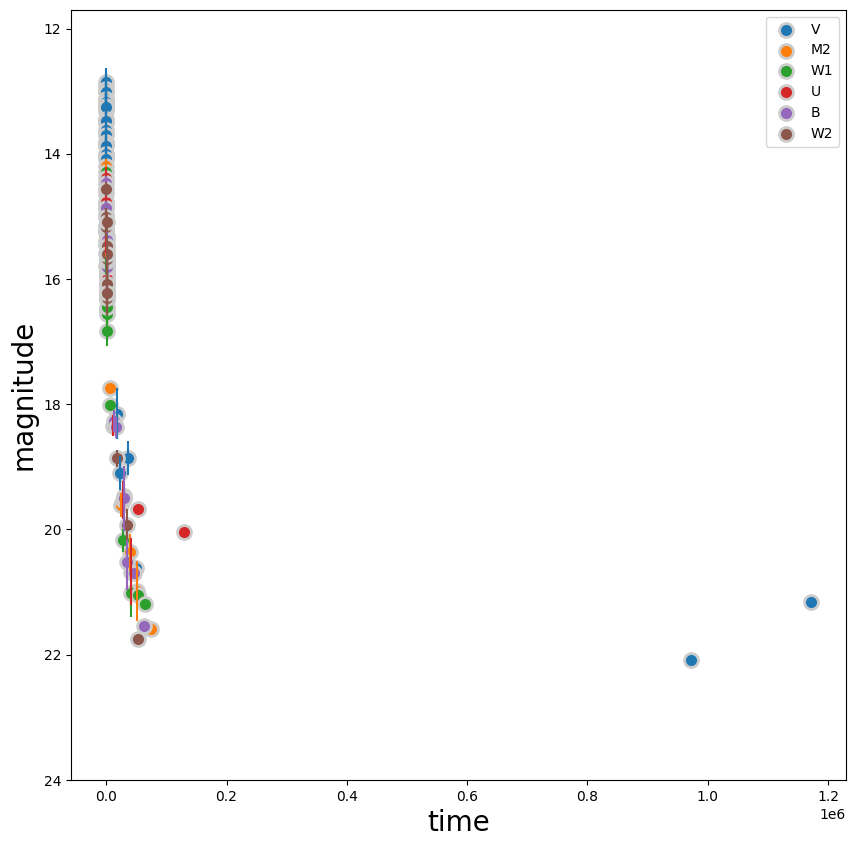

In [5]:
#create a figure container and an axis object inside of it
ax = plt.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    plt.errorbar(grbAG.loc[grbAG["filter"] == f, "time"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    plt.scatter(grbAG.loc[grbAG["filter"] == f, "time"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    plt.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
plt.ylim(24,11.7)
plt.legend()

#Always rememebr you axis labels!!
plt.ylabel("magnitude", fontsize=20)
plt.xlabel("time", fontsize=20)

In [6]:
grbAG['logtime'] = np.log10(grbAG['time'])
grbAG = grbAG[grbAG.upperlimit == 0]

Text(0.5, 0, 'log time')

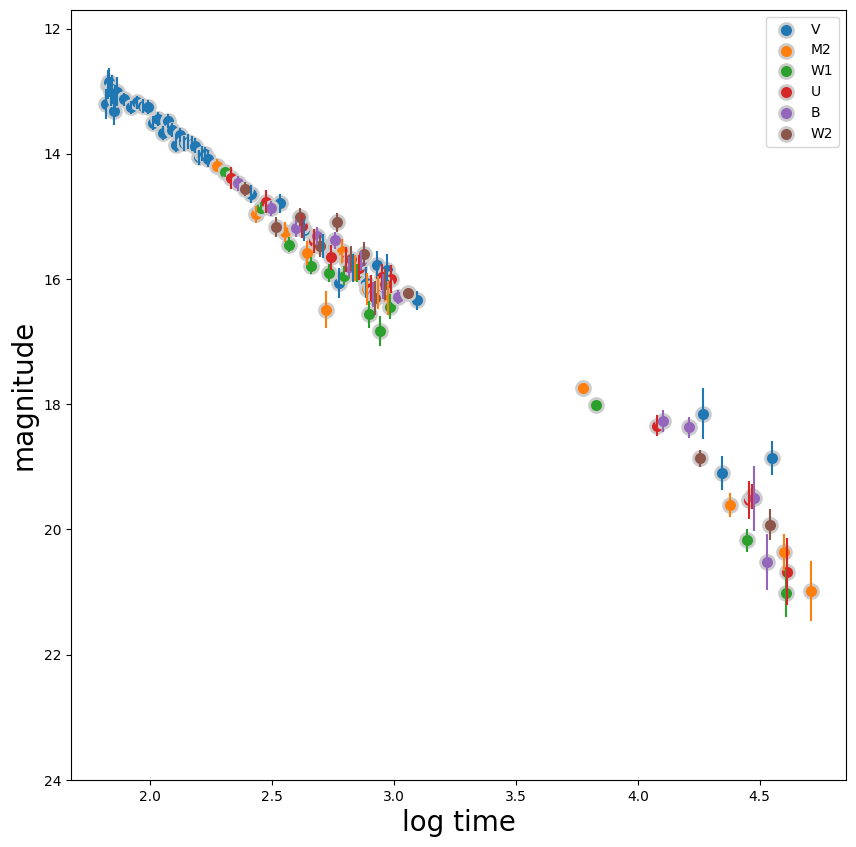

In [7]:
#create a figure container and an axis object inside of it
ax = plt.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    plt.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    plt.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    plt.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
plt.ylim(24,11.7)
plt.legend()

#Always rememebr you axis labels!!
plt.ylabel("magnitude", fontsize=20)
plt.xlabel("log time", fontsize=20)

In [8]:
x = grbAG['logtime'].values
X = np.c_[np.ones(len(x)), x]
y = grbAG['mag'].values

In [9]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [10]:
print(f'Best fit parameters from the Normal Equation are intercept {theta_best[0]:.2f} and slope {theta_best[1]:.2f}')

Best fit parameters from the Normal Equation are intercept 8.58 and slope 2.51


In [11]:
lr = LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([0.        , 2.51199984]), 8.582668233648771)

In [12]:
print(f'Best fit parameters from SKLearn are intercept {lr.intercept_:.2f} and slope {lr.coef_[1]:.2f}')

Best fit parameters from SKLearn are intercept 8.58 and slope 2.51


In [13]:
def line(intercept, slope, x):

  y = slope * x + intercept

  return y

def obj_func(args, x, y):

  intercept, slope = args

  return sum(np.abs(y - line(intercept, slope, x)))

initial_guess = (10, 1)
obj_funct_solution = minimize(obj_func, initial_guess, args=(x, y))
print(obj_funct_solution)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 26.303314072819276
        x: [ 8.225e+00  2.641e+00]
      nit: 20
      jac: [ 0.000e+00 -7.153e-07]
 hess_inv: [[ 2.576e-07 -1.766e-08]
            [-1.766e-08  5.461e-09]]
     nfev: 180
     njev: 60


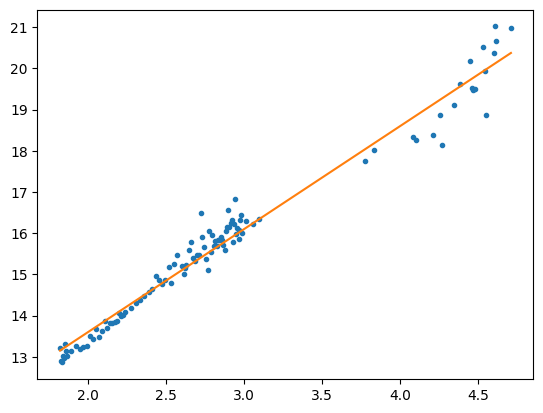

In [14]:
plt.plot(x, y, '.')
plt.plot(x, line(8.6, 2.5, x))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
reg = LinearRegression()
reg.fit(x_train, y_train)

print(f'R^2 on training set: {reg.score(x_train, y_train):.3f}.' + '\n' + f'R^2 of test set: {reg.score(x_test, y_test):.3f}.')

R^2 on training set: 0.972.
R^2 of test set: 0.970.
